In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
import csv

In [29]:
# load dataset
dataset_original = pd.read_csv ("bike_sharing.csv")
dataset = dataset_original
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
dataset = dataset.loc[:,['temp','cnt']]

In [31]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 17379 rows and 2 Columns


In [32]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [33]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.34,0.5,0.66,1.0
cnt,17379.0,189.463088,181.387599,1.00,40.00,142.0,281.00,977.0


In [34]:
dataset.isnull().sum()

temp    0
cnt     0
dtype: int64

In [35]:
# check for minimum dataset
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [36]:
# split train and test data
train, test = train_test_split(dataset,test_size = 0.30, random_state=0)
print("train : ", train.shape, " test : ", test.shape)

train :  (12165, 2)  test :  (5214, 2)


In [37]:
# saving datasets into csv files
test.to_csv('CSV_files/test_file.csv',index=False,encoding='utf-8')

In [38]:
# divide train data into train and cross validation 
train_data, crossV_data = train_test_split(train,test_size = 0.20,random_state=0)  

In [39]:
#load data into csv for train and cross validation
train_data.to_csv('CSV_files/train_file.csv',index=False,encoding='utf-8')
crossV_data.to_csv('CSV_files/CValidation_file.csv',index=False,encoding='utf-8') 

In [40]:
print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)

train_data :  (9732, 2)  crossV_data :  (2433, 2)


In [41]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 9732 rows and 2 Columns


In [42]:
# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 2433 rows and 2 Columns


In [43]:
train_dataset.head()

,temp,cnt
0,0.20,110
1,0.24,23
2,0.70,68
3,0.42,322
4,0.72,6



Model Fitted

 Accuracy train by acc_r2 99.99819116648703

 Accuracy train by mean_ab 98.72546924090018


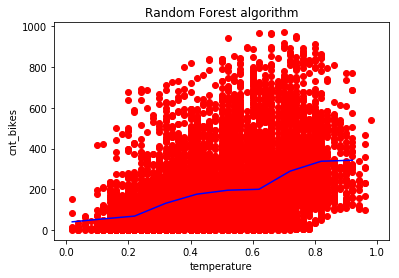

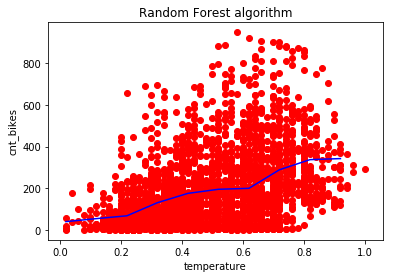

In [48]:
class RandomForestModel2():
    
    def Fit_Model(self,x_train,y_train):
        regression = RandomForestRegressor(n_estimators= 300 ,random_state=0)
        regression.fit(x_train,y_train)
        return regression

    def prediction(self,x_train,regression):
        # predicting the test set result
        y_predict = regression.predict(x_train)
        return y_predict
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        acc_r2 = r2_score(y_train, y_predict_train)
        acc_r2 = (1-(acc_r2/len(y_train)))*100
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab = ( 1- (total_error / len(y_train))) *100
        return acc_r2,mean_ab
   
    def visualization(self,x_train,y_train, regression):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_train), max(x_train), 0.1)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'blue')
        plt.title("Random Forest algorithm")
        plt.xlabel("temperature")
        plt.ylabel("cnt_bikes")
        plt.show()

def main():
    obj = RandomForestModel2()
    
    # seperate fetures and label
    # here we taking only 2 columns level and salary
    # train data
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values  
   
    # cross validate
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values

    # Fitting  model      
    regressor = obj.Fit_Model(x_train,y_train)
    print("\nModel Fitted")
    
    # make prediction over train data
    y_train_prediction = obj.prediction(x_train,regressor)
    
    # make prediction over cross validation data
    y_cv_predict = obj.prediction(x_cv, regressor)
    
    # getting accuracy
    accuracy_r2,mean_ab = obj.accuracy(y_train_prediction,y_train)
    
    print("\n Accuracy train by acc_r2", accuracy_r2)
    print("\n Accuracy train by mean_ab", mean_ab)

    # Setting threshold limit where we get accuracy greater than 85%
    # then save our model in pickle file    
    if accuracy_r2 or mean_ab > 80:
#         dump train model in pickle file
        file = open('RFM.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()     

    obj.visualization(x_train,y_train, regressor)
    obj.visualization(x_cv, y_cv, regressor)

if __name__ == '__main__':
    main()
